# 2D WavePacket Scattering From Gaussian Potential

Reference: https://qojulia.org/documentation/examples/wavepacket2D.html

In [2]:
using QuantumOptics, PyPlot

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186
┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /Users/deepak/.julia/packages/PyCall/RQjD7/src/PyCall.jl:698
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /Users/deepak/.julia/packages/Conda/CpuvI/src/Conda.jl:112


Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/deepak/.julia/conda/3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |           py37_0          14 KB
    freetype-2.9.1             |       hb4e5f40_0         864 KB
    kiwisolver-1.0.1           |   py37h0a44026_0          56 KB
    libpng-1.6.36              |       ha441bb4_0         296 KB
    matplotlib-3.0.2           |   py37h54f8f79_0         6.5 MB
    pyparsing-2.3.1            |           py37_0         105 KB
    python-dateutil-2.8.0      |           py37_0         281 KB
    pytz-2018.9                |           py37_0         268 KB
    tornado-5.1.1              |   py37h1de35cc_0         661 KB
    ------------------------------------------------------------
                                           Tota

## Define Grid Size

In [3]:
Npointsx = 100
Npointsy = 100

xmin = -30
xmax = 50

ymin = -20
ymax = 20

20

## Define Position and Momentum Basis States

In [4]:
b_positionx = PositionBasis(xmin, xmax, Npointsx)

Position(xmin=-30.0, xmax=50.0, N=100)

In [10]:
b_positiony = PositionBasis(ymin, ymax, Npointsy)

Position(xmin=-20.0, xmax=20.0, N=100)

In [11]:
b_momentumx = MomentumBasis(b_positionx)
b_momentumy = MomentumBasis(b_positiony)

Momentum(pmin=-7.853981633974483, pmax=7.853981633974483, N=100)

In [12]:
b_composite_pos = b_positionx ⊗ b_positiony
b_composite_mom = b_momentumx ⊗ b_momentumy

[Momentum(pmin=-3.9269908169872414, pmax=3.9269908169872414, N=100) ⊗ Momentum(pmin=-7.853981633974483, pmax=7.853981633974483, N=100)]

In [42]:
?LazyTensor

search: LazyTensor operators_lazytensor



```
LazyTensor(b1[, b2], indices, operators[, factor=1])
```

Lazy implementation of a tensor product of operators.

The suboperators are stored in the `operators` field. The `indices` field specifies in which subsystem the corresponding operator lives. Additionally, a complex factor is stored in the `factor` field which allows for fast multiplication with numbers.


# Rough Work

In [3]:
FockBasis??

LoadError: syntax: space required before "?" operator

In [4]:
%load

```
The analogue of `%load filename` in IPython is `IJulia.load("filename")`
in IJulia (to load code from `filename` into the current frontend)

The analogue of `%load url` is `IJulia.load(download("url"))`.
```


In [5]:
FockBasis??

LoadError: syntax: space required before "?" operator

In [6]:
b = FockBasis(20)
b

Fock(cutoff=20)

## Function Help

Instead of writing:

> `FunctionName?`

as you would in Python to get help on the given function, in IJulia one puts the question mark *before* the method name:

> `?FunctionName`

Unfortunately, unlike Python the `??` operator for showing the code for a given method is not present in IJulia.

In [8]:
?FockBasis

search: FockBasis



```
FockBasis(N)
```

Basis for a Fock space where `N` specifies a cutoff, i.e. what the highest included fock state is. Note that the dimension of this basis then is N+1.


In [9]:
??FockBasis

LoadError: Invalid @var syntax `invalid identifier name "?"`.

## Entering Math Symbols

IJulia has a really nice way of entering math symbols on the command line. Julia has inbuilt support for LaTeX math symbols which can be used a variable or function names. To enter a symbol on the command line, type the latex name followed by the `TAB` key:

> `\latexname TAB`

, *without* a space between the symbol name and the `TAB`, e.g.

> `\omega TAB`

gives

$\omega$

In [21]:
ω = 4

4

In [22]:
2ω 

8

In [24]:
ans

8

In [25]:
?mod2pi

search: mod2pi



```
mod2pi(x)
```

Modulus after division by `2π`, returning in the range $[0,2π)$.

This function computes a floating point representation of the modulus after division by numerically exact `2π`, and is therefore not exactly the same as `mod(x,2π)`, which would compute the modulus of `x` relative to division by the floating-point number `2π`.

# Examples

```jldoctest
julia> mod2pi(9*pi/4)
0.7853981633974481
```


In [26]:
?isapprox

search: isapprox



```
isapprox(x, y; rtol::Real=atol>0 ? 0 : √eps, atol::Real=0, nans::Bool=false, norm::Function)
```

Inexact equality comparison: `true` if `norm(x-y) <= max(atol, rtol*max(norm(x), norm(y)))`. The default `atol` is zero and the default `rtol` depends on the types of `x` and `y`. The keyword argument `nans` determines whether or not NaN values are considered equal (defaults to false).

For real or complex floating-point values, if an `atol > 0` is not specified, `rtol` defaults to the square root of [`eps`](@ref) of the type of `x` or `y`, whichever is bigger (least precise). This corresponds to requiring equality of about half of the significand digits. Otherwise, e.g. for integer arguments or if an `atol > 0` is supplied, `rtol` defaults to zero.

`x` and `y` may also be arrays of numbers, in which case `norm` defaults to `vecnorm` but may be changed by passing a `norm::Function` keyword argument. (For numbers, `norm` is the same thing as `abs`.) When `x` and `y` are arrays, if `norm(x-y)` is not finite (i.e. `±Inf` or `NaN`), the comparison falls back to checking whether all elements of `x` and `y` are approximately equal component-wise.

The binary operator `≈` is equivalent to `isapprox` with the default arguments, and `x ≉ y` is equivalent to `!isapprox(x,y)`.

Note that `x ≈ 0` (i.e., comparing to zero with the default tolerances) is equivalent to `x == 0` since the default `atol` is `0`.  In such cases, you should either supply an appropriate `atol` (or use `norm(x) ≤ atol`) or rearrange your code (e.g. use `x ≈ y` rather than `x - y ≈ 0`).   It is not possible to pick a nonzero `atol` automatically because it depends on the overall scaling (the "units") of your problem: for example, in `x - y ≈ 0`, `atol=1e-9` is an absurdly small tolerance if `x` is the [radius of the Earth](https://en.wikipedia.org/wiki/Earth_radius) in meters, but an absurdly large tolerance if `x` is the [radius of a Hydrogen atom](https://en.wikipedia.org/wiki/Bohr_radius) in meters.

# Examples

```jldoctest
julia> 0.1 ≈ (0.1 - 1e-10)
true

julia> isapprox(10, 11; atol = 2)
true

julia> isapprox([10.0^9, 1.0], [10.0^9, 2.0])
true

julia> 1e-10 ≈ 0
false

julia> isapprox(1e-10, 0, atol=1e-8)
true
```


In [23]:
methodswith(MomentumBasis)

[1] gaussianstate(b::MomentumBasis, x0::Real, p0::Real, sigma::Real) in QuantumOptics.particle at /Users/deepak/.julia/packages/QuantumOptics/fwWGR/src/particle.jl:127
[2] momentum(b::MomentumBasis) in QuantumOptics.particle at /Users/deepak/.julia/packages/QuantumOptics/fwWGR/src/particle.jl:188
[3] position(b::MomentumBasis) in QuantumOptics.particle at /Users/deepak/.julia/packages/QuantumOptics/fwWGR/src/particle.jl:179
[4] potentialoperator(b::MomentumBasis, V::Function) in QuantumOptics.particle at /Users/deepak/.julia/packages/QuantumOptics/fwWGR/src/particle.jl:216
[5] samplepoints(b::MomentumBasis) in QuantumOptics.particle at /Users/deepak/.julia/packages/QuantumOptics/fwWGR/src/particle.jl:163
[6] spacing(b::MomentumBasis) in QuantumOptics.particle at /Users/deepak/.julia/packages/QuantumOptics/fwWGR/src/particle.jl:150
[7] transform(basis_l::MomentumBasis, basis_r::PositionBasis) in QuantumOptics.particle at /Users/deepak/.julia/packages/QuantumOptics/fwWGR/src/particle.jl:340
[8] transform(basis_l::PositionBasis, basis_r::MomentumBasis) in QuantumOptics.particle at /Users/deepak/.julia/packages/QuantumOptics/fwWGR/src/particle.jl:365
[9] ==(b1::MomentumBasis, b2::MomentumBasis) in QuantumOptics.particle at /Users/deepak/.julia/packages/QuantumOptics/fwWGR/src/particle.jl:72
[10] show(stream::IO, x::MomentumBasis) in QuantumOptics.printing at /Users/deepak/.julia/packages/QuantumOptics/fwWGR/src/printing.jl:76

In [25]:
less(transform)

ErrorException: function has multiple methods; please specify a type signature

In [28]:
@less

LoadError: MethodError: no method matching @less(::LineNumberNode, ::Module)
Closest candidates are:
  @less(::LineNumberNode, ::Module, !Matched::Any) at /Users/osx/buildbot/slave/package_osx64/build/usr/share/julia/stdlib/v1.1/InteractiveUtils/src/macros.jl:122

In [30]:
using InteractiveUtils

In [33]:
less(FockBasis)

module fock

export FockBasis, number, destroy, create, displace, fockstate, coherentstate

import Base: ==

using ..bases, ..states, ..operators, ..operators_dense, ..operators_sparse
using SparseArrays


"""
    FockBasis(N)

Basis for a Fock space where `N` specifies a cutoff, i.e. what the highest
included fock state is. Note that the dimension of this basis then is N+1.
"""
mutable struct FockBasis <: Basis
    shape::Vector{Int}
    N::Int
    function FockBasis(N::Int)
        if N < 0
            throw(DimensionMismatch())
        end
        new([N+1], N)
    end
end


==(b1::FockBasis, b2::FockBasis) = b1.N==b2.N

"""
    number(b::FockBasis)

Number operator for the specified Fock space.
"""
function number(b::FockBasis)
    diag = complex.(0.:b.N)
    data = spdiagm(0 => diag)
    SparseOperator(b, data)
end

"""
    destroy(b::FockBasis)

Annihilation operator for the specified Fock space.
"""
function destroy(b::FockBasis)
    diag = complex.(sqrt.(1.:b.N))
    data = spd

In [27]:
using Pkg

In [28]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1186


In [29]:
gr()

Plots.GRBackend()

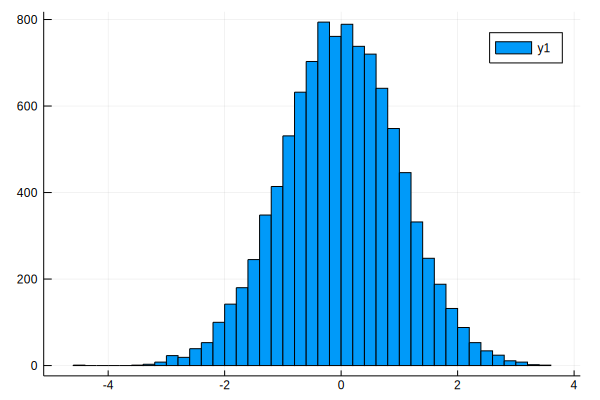

In [30]:
histogram(randn(10000))

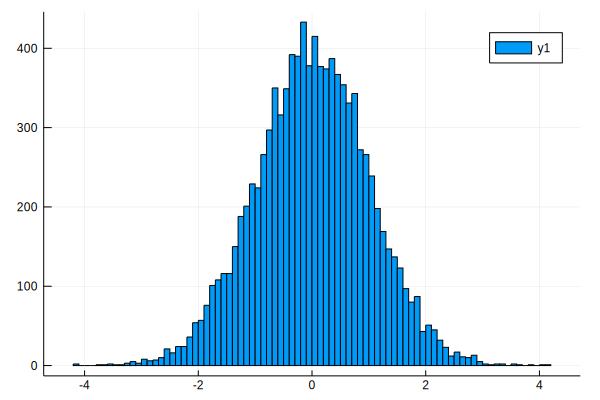

In [31]:
histogram(randn(10000), nbins = 100)

In [13]:
varinfo()

| name        |     size | summary   |
|:----------- | --------:|:--------- |
| Base        |          | Module    |
| Core        |          | Module    |
| Main        |          | Module    |
| b           | 64 bytes | FockBasis |
| startupfile | 53 bytes | String    |


In [35]:
b = FockBasis(20)

Fock(cutoff=20)

In [36]:
a = destroy(b)

SparseOperator(dim=21x21)
  basis: Fock(cutoff=20)
  [1 ,  2]  =  1.0+0.0im
  [2 ,  3]  =  1.41421+0.0im
  [3 ,  4]  =  1.73205+0.0im
  [4 ,  5]  =  2.0+0.0im
  [5 ,  6]  =  2.23607+0.0im
  [6 ,  7]  =  2.44949+0.0im
  [7 ,  8]  =  2.64575+0.0im
  [8 ,  9]  =  2.82843+0.0im
  [9 , 10]  =  3.0+0.0im
  [10, 11]  =  3.16228+0.0im
  [11, 12]  =  3.31662+0.0im
  [12, 13]  =  3.4641+0.0im
  [13, 14]  =  3.60555+0.0im
  [14, 15]  =  3.74166+0.0im
  [15, 16]  =  3.87298+0.0im
  [16, 17]  =  4.0+0.0im
  [17, 18]  =  4.12311+0.0im
  [18, 19]  =  4.24264+0.0im
  [19, 20]  =  4.3589+0.0im
  [20, 21]  =  4.47214+0.0im

In [37]:
at = create(b)

SparseOperator(dim=21x21)
  basis: Fock(cutoff=20)
  [2 ,  1]  =  1.0+0.0im
  [3 ,  2]  =  1.41421+0.0im
  [4 ,  3]  =  1.73205+0.0im
  [5 ,  4]  =  2.0+0.0im
  [6 ,  5]  =  2.23607+0.0im
  [7 ,  6]  =  2.44949+0.0im
  [8 ,  7]  =  2.64575+0.0im
  [9 ,  8]  =  2.82843+0.0im
  [10,  9]  =  3.0+0.0im
  [11, 10]  =  3.16228+0.0im
  [12, 11]  =  3.31662+0.0im
  [13, 12]  =  3.4641+0.0im
  [14, 13]  =  3.60555+0.0im
  [15, 14]  =  3.74166+0.0im
  [16, 15]  =  3.87298+0.0im
  [17, 16]  =  4.0+0.0im
  [18, 17]  =  4.12311+0.0im
  [19, 18]  =  4.24264+0.0im
  [20, 19]  =  4.3589+0.0im
  [21, 20]  =  4.47214+0.0im

In [41]:
α = 1.5
ψ = coherentstate(b, α)

Ket(dim=21)
  basis: Fock(cutoff=20)
 0.32465246735834974 + 0.0im
 0.48697870103752466 + 0.0im
   0.516518912695575 + 0.0im
  0.4473184999294846 + 0.0im
 0.33548887494711344 + 0.0im
 0.22505277902300153 + 0.0im
 0.13781611845042288 + 0.0im
 0.07813439487343699 + 0.0im
 0.04143702034418602 + 0.0im
 0.02071851017209301 + 0.0im
 0.00982765228037716 + 0.0im
 0.00444472297964886 + 0.0im
 0.00192462150658019 + 0.0im
  0.0008006909455195 + 0.0im
 0.00032099048473136 + 0.0im
 0.00012431908016556 + 0.0im
   4.661965506209e-5 + 0.0im
   1.696039076919e-5 + 0.0im
    5.99640366223e-6 + 0.0im
    2.06350402013e-6 + 0.0im
     6.9212028913e-7 + 0.0im

In [42]:
dpsi = -1im*(a + at)*ψ

Ket(dim=21)
  basis: Fock(cutoff=20)
 0.0 - 0.48697870103752466im
 0.0 - 1.0551205189146367im 
 0.0 - 1.4634702526374623im 
 0.0 - 1.5656147497531963im 
 0.0 - 1.3978703122796392im 
 0.0 - 1.0877550986111741im 
 0.0 - 0.7579886514773257im 
 0.0 - 0.4818287683861948im 
 0.0 - 0.28315297235193787im
 0.0 - 0.15538882629069758im
 0.0 - 0.08025916028974679im
 0.0 - 0.03926171965356496im
 0.0 - 0.0182839043125118im 
 0.0 - 0.00814035794611487im
 0.0 - 0.00347739691792307im
 0.0 - 0.00142966942190395im
 0.0 - 0.00056720580325537im
 0.0 - 0.00021765834820463im
 0.0 - 8.095144944017e-5im  
 0.0 - 2.923297361856e-5im  
 0.0 - 9.22827052173e-6im   

In [43]:
ρ = ψ ⊗ dagger(ψ)

DenseOperator(dim=21x21)
  basis: Fock(cutoff=20)
    0.105399+0.0im     0.158099+0.0im  …   2.24699e-7+0.0im
    0.158099+0.0im     0.237148+0.0im      3.37048e-7+0.0im
    0.167689+0.0im     0.251534+0.0im      3.57493e-7+0.0im
    0.145223+0.0im     0.217835+0.0im      3.09598e-7+0.0im
    0.108917+0.0im     0.163376+0.0im      2.32199e-7+0.0im
   0.0730639+0.0im     0.109596+0.0im  …   1.55764e-7+0.0im
   0.0447423+0.0im    0.0671135+0.0im      9.53853e-8+0.0im
   0.0253665+0.0im    0.0380498+0.0im      5.40784e-8+0.0im
   0.0134526+0.0im    0.0201789+0.0im      2.86794e-8+0.0im
  0.00672632+0.0im    0.0100895+0.0im      1.43397e-8+0.0im
  0.00319057+0.0im   0.00478586+0.0im  …   6.80192e-9+0.0im
  0.00144299+0.0im   0.00216449+0.0im      3.07628e-9+0.0im
 0.000624833+0.0im   0.00093725+0.0im      1.33207e-9+0.0im
 0.000259946+0.0im  0.000389919+0.0im     5.54174e-10+0.0im
  0.00010421+0.0im  0.000156316+0.0im     2.22164e-10+0.0im
  4.03605e-5+0.0im   6.05407e-5+0.0im  …  8.60438e

In [45]:
eigenenergies(ρ)

21-element Array{Float64,1}:
 -5.301144719194072e-17 
 -1.703489604923616e-17 
 -8.098395503233256e-18 
 -7.524329328798859e-18 
 -7.60786942331218e-19  
 -8.509009103378091e-21 
 -3.5385104750145357e-22
 -8.518889080218535e-24 
 -1.7140187709062712e-25
 -1.0134430168095293e-26
 -1.8602307980978968e-28
  3.5557301919192443e-26
  8.643428745861042e-24 
  8.939079634087102e-23 
  2.3903772059749178e-21
  4.637784642224626e-20 
  4.428169131633601e-18 
  1.0187323163642718e-17
  1.3224874380364339e-17
  1.8428919327896877e-16
  0.9999999999999433    

In [47]:
?fockstate

search: fockstate



```
fockstate(b::FockBasis, n)
```

Fock state $|n⟩$ for the specified Fock space.


In [48]:
?spindown

search: spindown



```
spindown(b::SpinBasis)
```

Spin down state for the given Spin basis.
